<h1>Clusterização dos canais do Science Vlogs Brasil</h1>
<br>
Dataset disponível no <a href='https://github.com/lucaslattari/MachineLearningSeries/tree/master/Ep%2021'>Github</a>
<br>
Este modelo foi produzido com base no vídeo do Universo Discreto no <a href='https://www.youtube.com/watch?v=p2twwtegYkU&ab_channel=UniversoDiscreto'>Youtube</a>
<br>
<br>
Este conjunto de dados possui duas colunas que caracterizam o canal de vídeo, que são Inscritos e Visualizações, que são nossos atributos e uma coluna com o nome do canal.
<br>
<br>
O foco é criar um algoritmo de Unsupervising Learning simples, no qual encontrará padrões via Clustering.
<br>
<br>
O algoritmo que será usado é o <b>K-Means</b>.

<h1>Importação das bibliotecas</h1>
<br>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
# Criando função que transformará os valores nulos de uma coluna do DataFrame na mediana dela
def fillMissingData(X, coluna):
    from sklearn.impute import SimpleImputer
    imputer = SimpleImputer(missing_values=np.nan, strategy='median')
    X[:, coluna:coluna + 1] = imputer.fit_transform(X[:, coluna:coluna + 1])
    return X

In [3]:
df = pd.read_csv('svbr.csv', delimiter=';')
df.head()

,Canal,Inscritos,Visualizações
0,Site Arqueologia Egípcia,13438.0,406590.0
1,Terra Negra,35241.0,868235.0
2,Frank Jaava,31680.0,2856508.0
3,Dispersciência,25100.0,150000.0
4,Olá Ciência,32788.0,1575456.0


<h1>Pré-processamento dos dados</h1>
<br>

In [4]:
# Transformando os valores nulos e colocando como tipo inteiro
df_matriz = df.to_numpy()
df_matriz = fillMissingData(df_matriz, 1)
df_matriz[:, 1] = df_matriz[:, 1].astype('int')
df_matriz = fillMissingData(df_matriz, 2)
df_matriz[:, 2] = df_matriz[:, 2].astype('int')

df.at[28, 'Inscritos'] = df_matriz[28][1]
df.at[28, 'Visualizações'] = df_matriz[28][2]

X = pd.DataFrame({'Inscritos': df_matriz[:, 1], 'Visualizações': df_matriz[:, 2]})
X.head()

,Inscritos,Visualizações
0,13438,406590
1,35241,868235
2,31680,2856508
3,25100,150000
4,32788,1575456


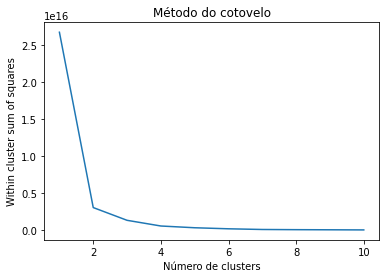

In [5]:
wcs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10)
    kmeans.fit(X)
    wcs.append(kmeans.inertia_)

plt.plot(range(1,11), wcs)
plt.title('Método do cotovelo')
plt.xlabel('Número de clusters')
plt.ylabel('Within cluster sum of squares')
plt.show()

<h1>Comentário</h1>
<br>
O gráfico nos mostra que o melhor número de clusters para o nosso conjunto de dados é o 2, porém testaremos com o número 3.

In [6]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10)
clusters = kmeans.fit_predict(X)

In [7]:
df['Cluster'] = clusters

In [8]:
dois = df['Cluster'] == 2
df[dois]

,Canal,Inscritos,Visualizações,Cluster
9,Minuto da Terra,274196.0,30166457.0,2
23,Minutos Psíquicos,648892.0,22555134.0,2
29,SpaceToday,321068.0,26277335.0,2
30,Ciência todo dia,528761.0,16969332.0,2


In [9]:
um = df['Cluster'] == 1
df[um]

,Canal,Inscritos,Visualizações,Cluster
18,Matemática Rio com Prof Rafael Procópio,1423056.0,93036517.0,1
32,Canal do Pirula,752573.0,76462787.0,1
39,Schwarza - Poligonautas,860493.0,118741623.0,1


In [10]:
zero = df['Cluster'] == 0
df[zero]

,Canal,Inscritos,Visualizações,Cluster
0,Site Arqueologia Egípcia,13438.0,406590.0,0
1,Terra Negra,35241.0,868235.0,0
2,Frank Jaava,31680.0,2856508.0,0
3,Dispersciência,25100.0,150000.0,0
4,Olá Ciência,32788.0,1575456.0,0
5,A matemaníaca por Julia Jaccoud,65453.0,1667892.0,0
6,Delta T - Os super lentos,12000.0,171361.0,0
7,Bláblálogia,161951.0,11027386.0,0
8,Efarsas,78876.0,6226235.0,0
10,Canal Cura Quântica,13148.0,250020.0,0


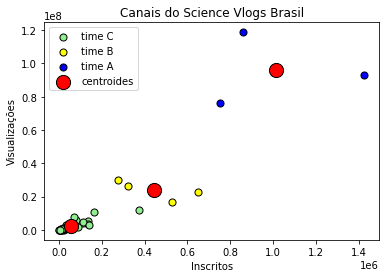

In [11]:
x = X.to_numpy()

plt.scatter(
    x[clusters == 0, 0], x[clusters == 0, 1],
    s=50, c='lightgreen', 
    edgecolor='black',
    label='time C'
)

plt.scatter(
    x[clusters == 2, 0], x[clusters == 2, 1],
    s=50, c='yellow', 
    edgecolor='black',
    label='time B'
)

plt.scatter(
    x[clusters == 1, 0], x[clusters == 1, 1],
    s=50, c='blue', 
    edgecolor='black',
    label='time A'
)

# Plotando os centróides
plt.scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
    s=200, c='red', edgecolor='black',
    label='centroides'
)

plt.title('Canais do Science Vlogs Brasil')
plt.xlabel('Inscritos')
plt.ylabel('Visualizações')
plt.legend()
plt.show()

<h1>Comentário</h1>
<br>
O gráfico acima nos mostra os centros de divisão dos três clusters e a divisão para cada ponto de dado, que no caso, refere-se ao ponto de convergência de visualização e inscritos de um canal.

<h1>Clusterização Hierárquica</h1>
<br>

<h1>Dendrograma</h1>
<br>

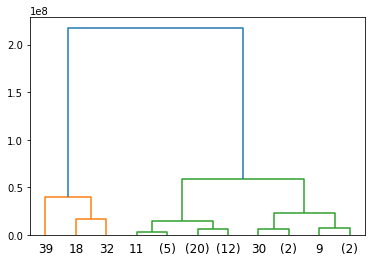

In [12]:
dendrogram(linkage(x, 'ward'), truncate_mode='level', p=3)
plt.show()

<b>O dendrograma indica os agrupamentos formados através dos níveis de semelhança. No caso, é mostrado com um grau 3 de parentesco.</b>

In [13]:
modelo = AgglomerativeClustering(affinity='euclidean', linkage='ward')
clusters_hier = modelo.fit_predict(x)
clusters_hier

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0], dtype=int64)

In [14]:
df['Cluster_hierarquica'] = clusters_hier
df.head()

,Canal,Inscritos,Visualizações,Cluster,Cluster_hierarquica
0,Site Arqueologia Egípcia,13438.0,406590.0,0,0
1,Terra Negra,35241.0,868235.0,0,0
2,Frank Jaava,31680.0,2856508.0,0,0
3,Dispersciência,25100.0,150000.0,0,0
4,Olá Ciência,32788.0,1575456.0,0,0


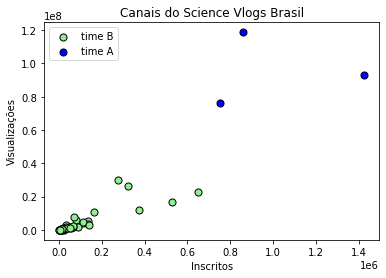

In [17]:
x = X.to_numpy()

plt.scatter(
    x[clusters_hier == 0, 0], x[clusters_hier == 0, 1],
    s=50, c='lightgreen', 
    edgecolor='black',
    label='time B'
)

plt.scatter(
    x[clusters_hier == 1, 0], x[clusters_hier == 1, 1],
    s=50, c='blue', 
    edgecolor='black',
    label='time A'
)

plt.title('Canais do Science Vlogs Brasil')
plt.xlabel('Inscritos')
plt.ylabel('Visualizações')
plt.legend(loc='upper left')
plt.show()

<h1>Comentário</h1>
<br>
O gráfico do cotovelo nos mostrava que o melhor número de clusters era <b>dois</b> e com a clusterização hierárquica tivemos o mesmo resultado. No modelo de KMeans, por escolha própria, foi feito com <b>três</b> clusters. A diferença é que a clusterização hierárquica escolhe automaticamente para nós o melhor número de agrupamentos.